---
# Part 1: Visualising Interaction Logs
---

## Prerequisites

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp
%matplotlib inline

In [2]:
#Corey's Colour Blind Tools 
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

CB_color_dict = {'blue':'#377eb8',
                 'orange': '#ff7f00',
                 'green': '#4daf4a',
                 'pink': '#f781bf', 
                 'brown': '#a65628',
                 'purple': '#984ea3',
                 'grey': '#999999', 
                 'black': '#000000',
                 'red': '#e41a1c', 
                 'yellow': '#dede00'}

## Simple File Read

In [3]:
#file_path = "/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-1/"
#interaction_log = pd.read_csv(file_path + "interactions.csv")

In [4]:
#interaction_log.head()

In [5]:
#interaction_log.describe()

## Click Visualisation

In [6]:
#draw clicks
import matplotlib.animation as animation
def drawClicks(log):
    x = log.x
    y = log.y

    fig, ax = pp.subplots()
    ax.scatter(x,y,color=CB_color_dict["blue"], alpha=0.1, s=1000.0)

    myPlot = matplotlib.pyplot.gcf()
    myPlot.set_size_inches(12, 8) #inches

## Prepare Data

In [7]:
def prepareLogs(log):
    log["ones"] = np.ones(int(log.x.size)) 
    return log
# interaction_log = prepareLogs(interaction_log)
# interaction_log.head()

## Categorise Interaction's Into A Descriptive Model

In [8]:
def categoriseBins(log):
    #code data into bins 
    #=========================================================================================================================
    pattern = log[log.description.str.contains("note") == True]
    #=========================================================================================================================
    navigate = log[log.description.str.contains("tab") == True]
    navigate = navigate.append(log[log.description.str.contains("bar selected") == True])
    #=========================================================================================================================
    playback = log[log.description.str.contains("play clicked") == True]
    playback = playback.append(log[log.description.str.contains("stop") == True])
    #=========================================================================================================================
    helps = log[log.description.str.contains("tutorial") == True]
    #=========================================================================================================================
    building = log[log.description.str.contains("drag") == True]
    building = building.append(log[log.description.str.contains("connection") == True])
    building = building.append(log[log.description.str.contains("was deleted") == True])
    building = building.append(log[log.description.str.contains("block added") == True])
    #=========================================================================================================================
    parameter = log[log.description.str.contains("increased") == True]
    parameter = parameter.append(log[log.description.str.contains("cremented") == True])
    parameter = parameter.append(log[log.description.str.contains("cremented") == True])
    parameter = parameter.append(log[log.description.str.contains("decreased") == True])
    parameter = parameter.append(log[log.description.str.contains("array button clicked") == True])
    parameter = parameter.append(log[log.description.str.contains("set to") == True])
    #=========================================================================================================================
    saving = log[log.description.str.contains("menu bar pressed") == True]
    saving = saving.append(log[log.description.str.contains("new clicked") == True])
    saving = saving.append(log[log.description.str.contains("load clicked") == True])
    saving = saving.append(log[log.description.str.contains("save clicked") == True])
    saving = saving.append(log[log.description.str.contains("save as clicked") == True])
    #==========================================================================================================================
    repeat = log[log.description.str.contains("copied") == True]
    repeat = repeat.append(log[log.description.str.contains("pasted") == True])
#     repeat = repeat.append(interaction_log[interaction_log.description.str.contains("endrepeat and") == True])
#     repeat = repeat.append(interaction_log[interaction_log.description.str.contains("and endrepeat") == True])
    return [pattern, navigate, playback, helps, building, parameter, saving, repeat]

# bins = categoriseBins(interaction_log)

## Visualise This Compositions Interaction

In [9]:
def drawTimeline(my_file_path, bins = [], *args):
# [pattern, navigate, playback, helps, building, parameter, saving, repeat]
    colours = [CB_color_dict['yellow'], 
               CB_color_dict['brown'],
               CB_color_dict['green'],
               CB_color_dict['orange'],
               CB_color_dict['blue'],
               CB_color_dict['purple'],
               CB_color_dict['red'],
               CB_color_dict['black']]
    
    labels = ['note-edit', 
               'navigate',
               'playback',
               'help',
               'building',
               'param-change',
               'saving',
               'clipboard']
    
    for i in range(len(bins)):
        if (bins[i].index.size > 0):
            pp.stem(bins[i].elapsedtime, 
                    bins[i].ones, 
                    colours[i], 
                    markerfmt=' ', 
                    label=labels[i], 
                    use_line_collection=True, 
                    basefmt=" ")

    print(my_file_path)
    
    pp.rcParams["figure.figsize"] = [15,5]
    pp.legend(loc=(1.01,0.655))
    pp.xlabel("Time (milliseconds)")
    pp.yticks([]) #hide y axis 
    pp.savefig(my_file_path + "visualisation.png")
    pp.show()

## Iterate to visualise all compositions

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-1/


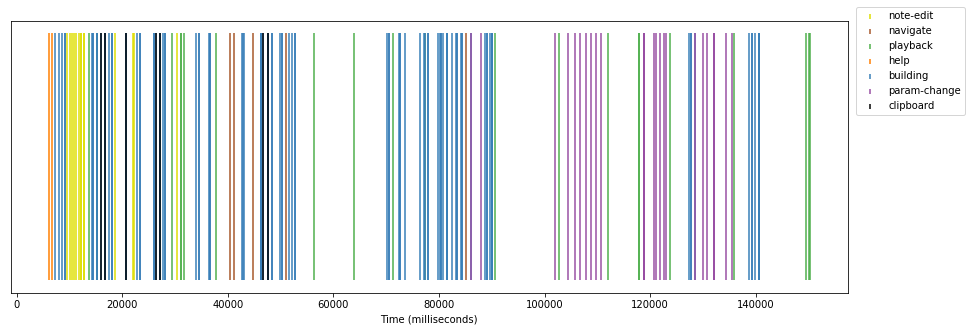

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-2/


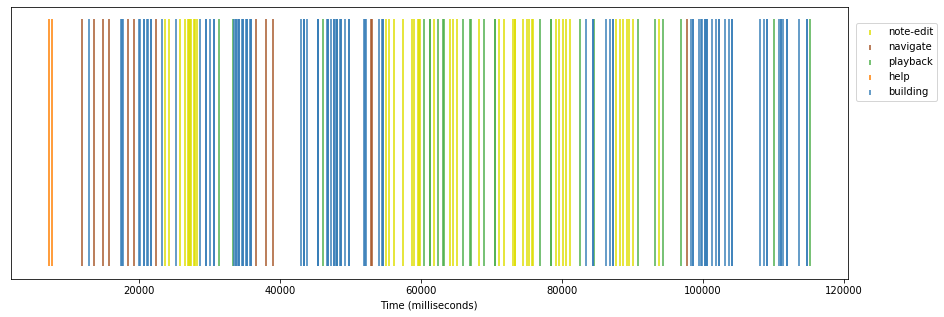

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-3/


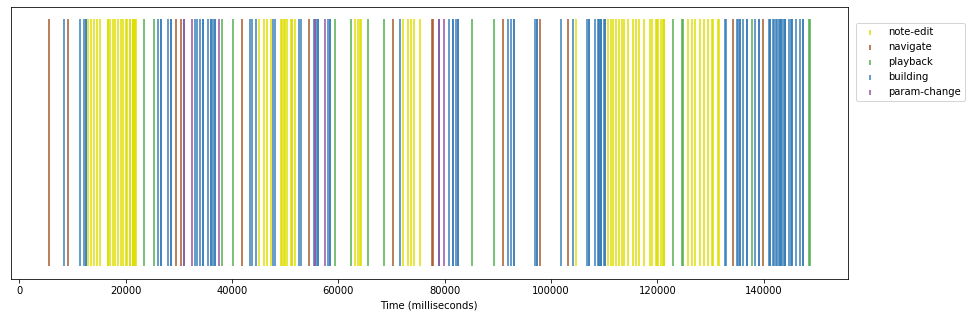

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-4/


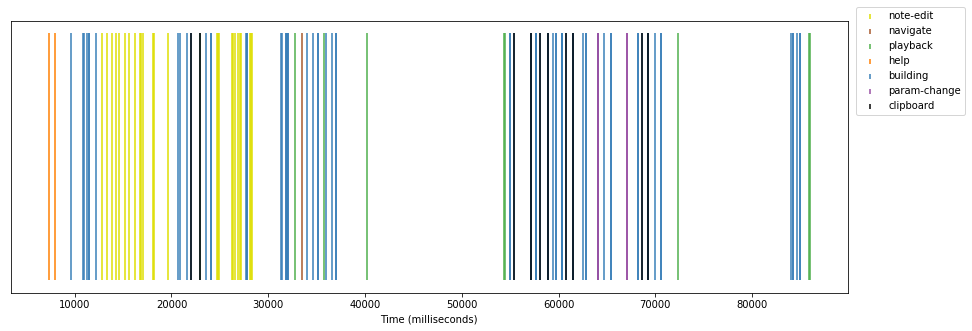

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-5/


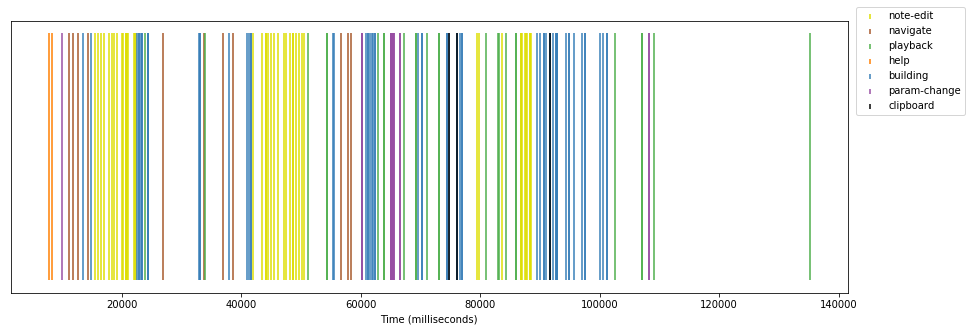

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-6/


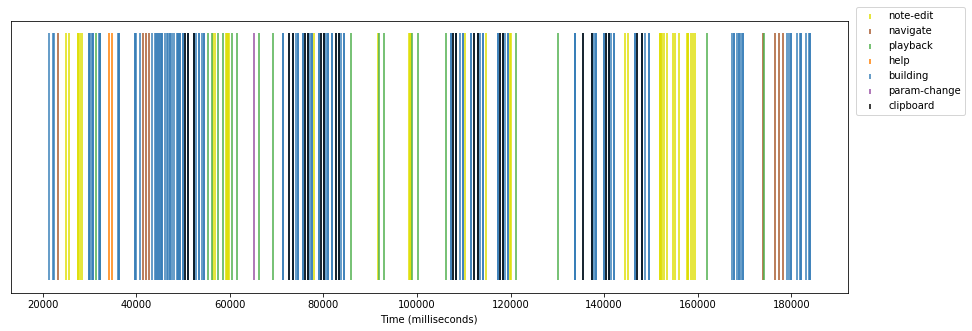

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-7/


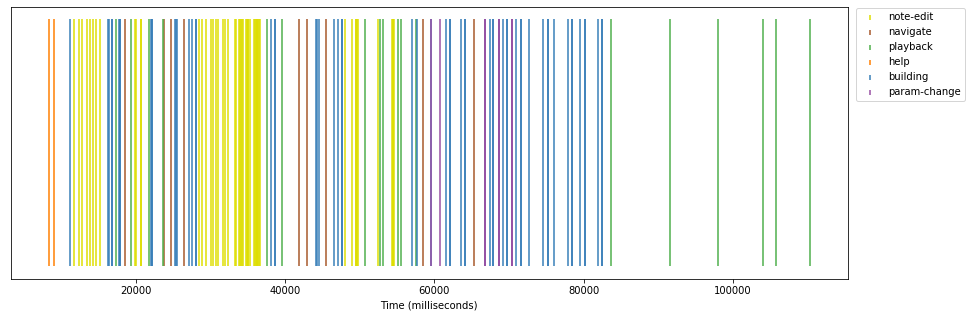

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-8/


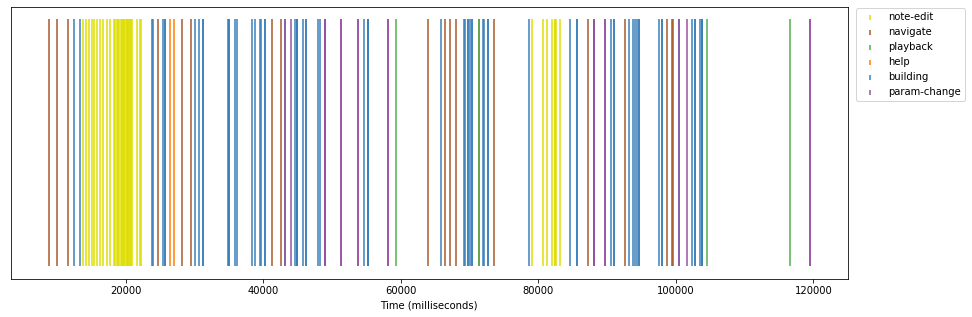

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-9/


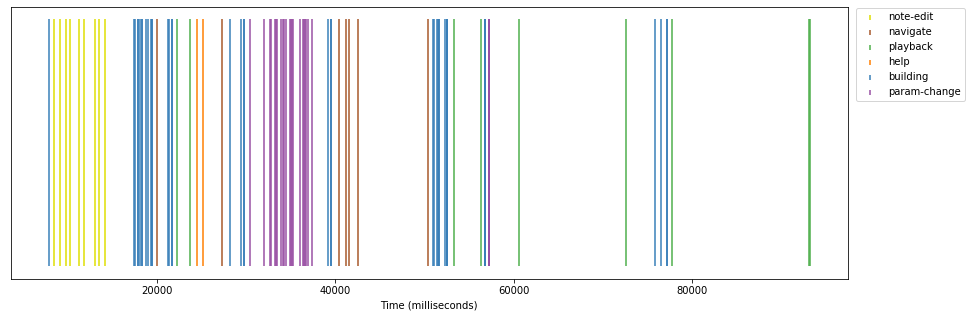

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-10/


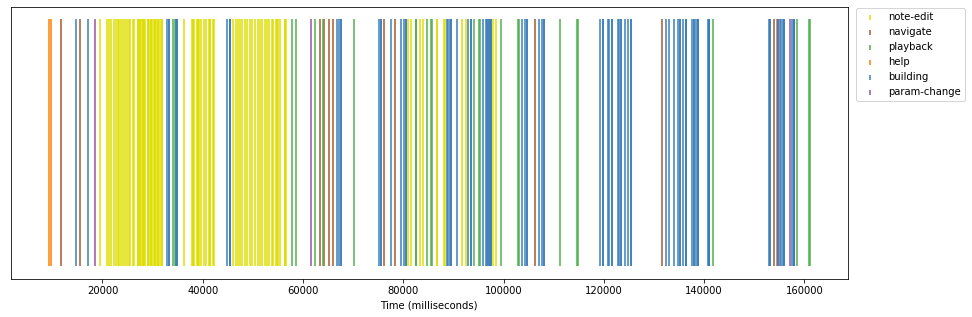

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-11/


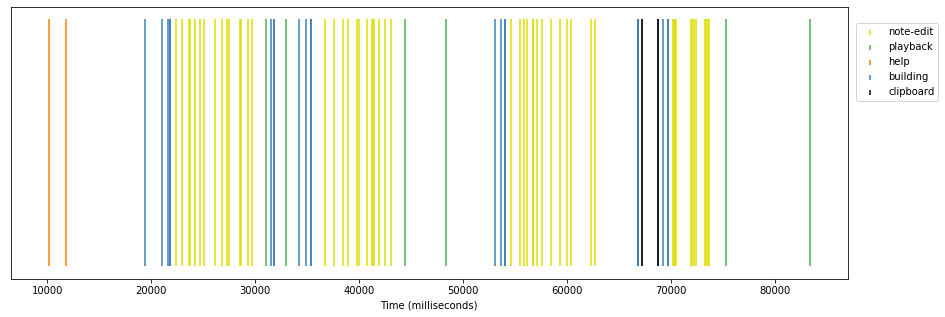

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-12/


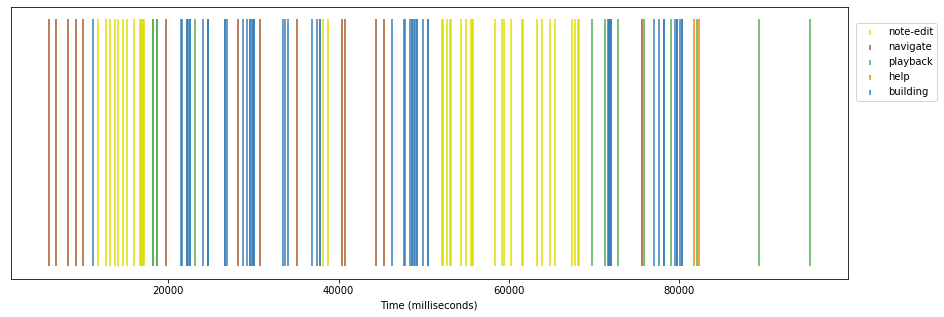

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-13/


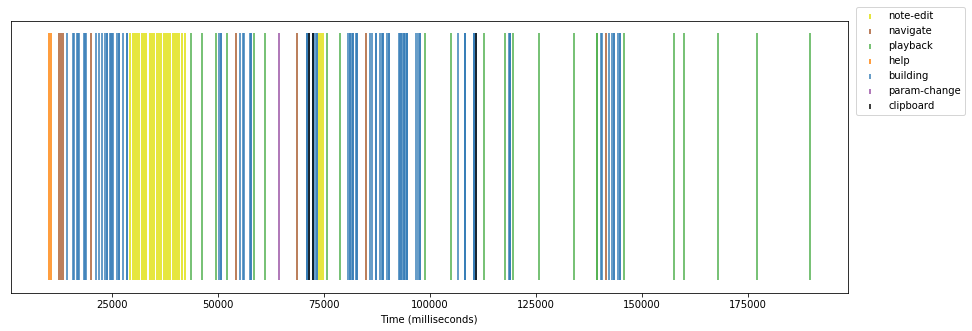

/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-14/


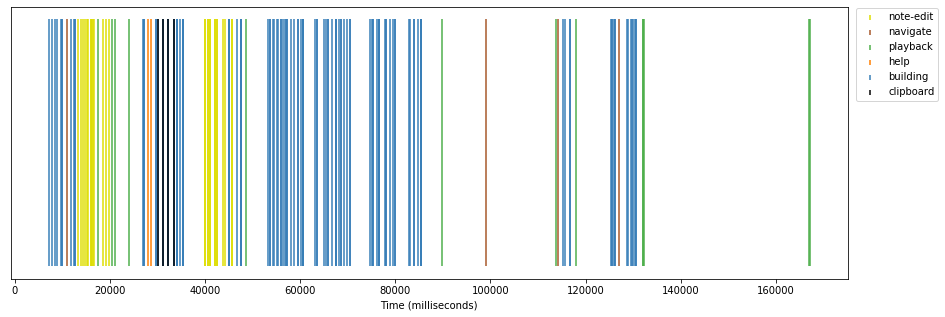

In [12]:
for i in range(1,15):
    file_path = "/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-" + str(i)+ "/"
    my_log = pd.read_csv(file_path + "interactions.csv")    
    my_log = prepareLogs(my_log)
    my_bins = categoriseBins(my_log)
    drawTimeline(file_path, my_bins)

---
# Part 2: Simple Objective Metrics
---

In [69]:
def get_simple_dataset():
    # create the data frame based on the creativity metric 
    creativity_assessment_scores = {'Creativity' : [2.54, 3.73, 3.31, 3.31, 3.27, 3.81, 3.35, 4.27, 3.42, 4.31, 1.54, 3.00, 3.42, 3.77]}

    total_data = pd.DataFrame(creativity_assessment_scores) 

    #iterate over all of the possible categories...
    labels = [ 'note-edit', 
               'navigate',
               'playback',
               'help',
               'building',
               'param-change',
               'saving',
               'clipboard' ]

    for i in range(len(labels)):
        total_metrics = []
        #for all of the files get the needed metrics... 
        for j in range(1,15):
            file_path = "/Users/coreyford/Documents/Prototype Data Logging/Exploring-Interaction-Data/coreys-dataset/comp-" + str(j)+ "/"
            my_log = pd.read_csv(file_path + "interactions.csv")    

            my_bins = categoriseBins(my_log)
            total_metrics.append(my_bins[i].index.size)

        total_data[labels[i]+"-count"] = total_metrics
    
    return total_data

get_simple_dataset()

,Creativity,note-edit-count,navigate-count,playback-count,help-count,building-count,param-change-count,saving-count,clipboard-count
0,2.54,26,5,21,2,115,31,0,7
1,3.73,47,13,27,2,104,0,0,0
2,3.31,76,14,16,0,102,7,0,0
3,3.31,38,1,8,2,102,4,0,10
4,3.27,54,11,25,2,75,17,0,3
5,3.81,49,8,20,2,305,1,0,23
6,3.35,53,9,18,2,63,8,0,0
7,4.27,38,19,4,2,74,18,0,0
8,3.42,9,7,9,2,41,29,0,0
9,4.31,94,11,26,2,98,4,0,0
